# Applications In Data Science Semester B 2021 TAU - Final Assignment
## Omri Berkovitch
## Part 2 - EDA

#### This notebook contains my EDA processs

* Data Sets - Used all of them.
* Graphs - I have splitted them for 2 sections.
    * Section 1 - Graphs that were Intersting for my opinion.
    * Section 2 - Graphs that can help me understand the data better, and to choose the features for the classification(Mostly the Text features)
* Appendix's(At the end):
    * Appendix 1 - Generating 3 features from the Images
    * Appendix 2 - The Merge of the 3 tabular data sets(At Part 1 one the project)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import matplotlib
import plotly.express as px
import seaborn as sns
from rake_nltk import Rake
from sklearn.decomposition import PCA
from sklearn import preprocessing
from skimage import io
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
import string
import os
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data sets
df_food_n = pd.read_csv('data/food_nutrients.csv')
df_nut = pd.read_csv('data/nutrients.csv')
df_train = pd.read_csv('data/food_train.csv')
df_test = pd.read_csv('data/food_test.csv')
categories = df_train['category'].unique()

In [3]:
df_all = pd.read_csv('combined_with_names.csv')
df_all = df_all.drop('Unnamed: 0',axis=1)
df_all.head(3)

idx                                   brand  \
0  29244                                 walkers   
1     13            csm bakery products na, inc.   
2     15  integrated global organics company llc   

                    description  \
0        gluten free shortbread   
1  powdered sugar brownie bites   
2    baked organic potato snack   

                                         ingredients  serving_size  \
0  flour blend (rice, potato starch, maize, stabi...         100.0   
1  sugar, enriched bleached flour (wheat flour, n...          39.0   
2  potato starch*, potato flakes*, corn flour*, s...          28.0   

  serving_size_unit household_serving_fulltext          category  Calcium, Ca  \
0                 g                    100 grm  cookies_biscuits            0   
1                 g                     39 grm               NaN            0   
2                 g                      1 onz               NaN          143   

   Iron, Fe  ...  Iodine, I  Folic acid  Carbohydrate, other  Vitamin E  \
0      0.00  ...          0           0                    0          0   
1      1.85  ...          0           0                    0          0   
2      0.00  ...          0           0                    0          0   

   Alcohol, ethyl  Vitamin E (alpha-tocopherol)  Xylitol  Molybdenum, Mo  \
0               0                             0        0               0   
1               0                             0        0               0   
2               0                             0        0               0   

   Biotin  Starch  
0       0     0.0  
1       0     0.0  
2       0     0.0  

[3 rows x 55 columns]

### Data Analysis 

### Observing which snack category may make you the most fat(Most calories)

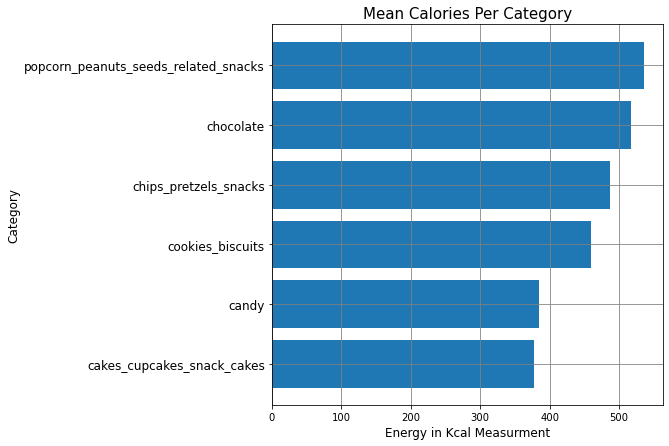

In [4]:
grp = df_all.groupby(by='category').mean()['Energy'].reset_index().sort_values(by='Energy')
fig = plt.figure(figsize=(7,7))
colors = ['green','blue','purple','brown','teal','red']
plt.barh(y=grp['category'],width=grp['Energy'])
plt.title('Mean Calories Per Category',fontsize=15)
plt.xlabel('Energy in Kcal Measurment',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Category',fontsize=12)
plt.grid(color='grey', linestyle='solid')
plt.show()

### Want to grow Muscles Faster? Eat some Protein please.

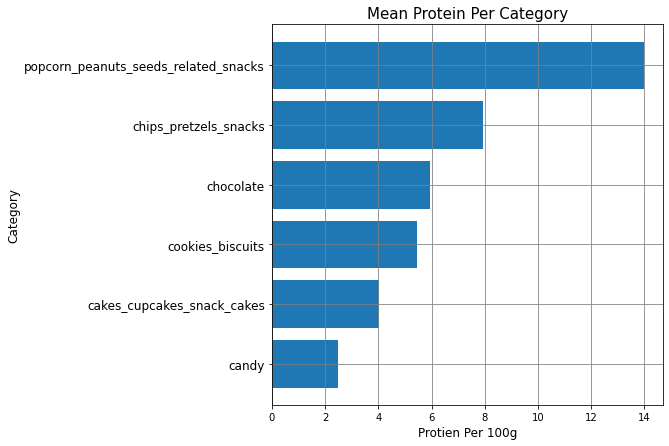

In [5]:
grp = df_all.groupby(by='category').mean()['Protein'].reset_index().sort_values(by='Protein')
fig = plt.figure(figsize=(7,7))
colors = ['green','blue','purple','brown','teal','red']
plt.barh(y=grp['category'],width=grp['Protein'])
plt.title('Mean Protein Per Category',fontsize=15)
plt.xlabel('Protien Per 100g',fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Category',fontsize=12)
plt.grid(color='grey', linestyle='solid')
plt.show()

### Showing the mean nutrition value per category among the nutritions that has less than 90% zeros

In [6]:
df2 = df_all.loc[:, (df_all==0).mean()< 0.9]
nut_cols = df2.select_dtypes(include=np.number).columns.tolist()[2:]
df2.groupby(by='category')[list(nut_cols)].agg(['mean']).reset_index()

category Calcium, Ca  Iron, Fe Vitamin A, IU  \
                                               mean      mean          mean   
0            cakes_cupcakes_snack_cakes   45.689382  2.417797    197.792921   
1                                 candy   25.401503  0.447485     55.110891   
2                 chips_pretzels_snacks   53.783696  2.241435    662.381250   
3                             chocolate   95.053552  4.279825     84.713415   
4                      cookies_biscuits   45.169001  2.212517    138.430167   
5  popcorn_peanuts_seeds_related_snacks   86.139830  4.041893     87.749640   

  Vitamin C, total ascorbic acid    Protein Total lipid (fat)  \
                            mean       mean              mean   
0                       0.948627   4.038748         17.595507   
1                      11.438027   2.476578          6.576676   
2                      11.698370   7.940345         23.803902   
3                       0.617869   5.924806         31.774576   
4                       3.681264   5.436845         20.116726   
5                       0.888895  13.984835         37.986725   

  Carbohydrate, by difference      Energy Sugars, total including NLEA  \
                         mean        mean                         mean   
0                   51.631849  377.443740                    32.220621   
1                   80.090193  384.457674                    59.687093   
2                   61.091981  487.181793                     4.230932   
3                   55.786530  516.450689                    44.969549   
4                   65.358547  459.083649                    33.100110   
5                   40.644891  535.762982                    18.151865   

  Fiber, total dietary  Sodium, Na Cholesterol Fatty acids, total saturated  \
                  mean        mean        mean                         mean   
0             1.532858  323.664289   99.530111                     7.235761   
1             0.777703  120.272152   15.587816                     3.686624   
2             5.210190  662.657609    0.808967                     3.916832   
3             4.477015  159.978261   35.677890                    18.782492   
4             2.507532  301.819644   23.526874                     9.284491   
5             7.121387  320.592283    1.777502                     7.586034   

  Fatty acids, total monounsaturated Fatty acids, total polyunsaturated  \
                                mean                               mean   
0                           0.806397                           0.613785   
1                           0.025120                           0.009342   
2                           3.863992                           3.322035   
3                           0.056736                           0.018606   
4                           1.354334                           0.812693   
5                           3.975750                           2.335914   

  Potassium, K  
          mean  
0    16.969361  
1    13.255011  
2   268.354348  
3    29.477200  
4    31.454201  
5   127.055069

### Observing the Serving size per category(In grams)

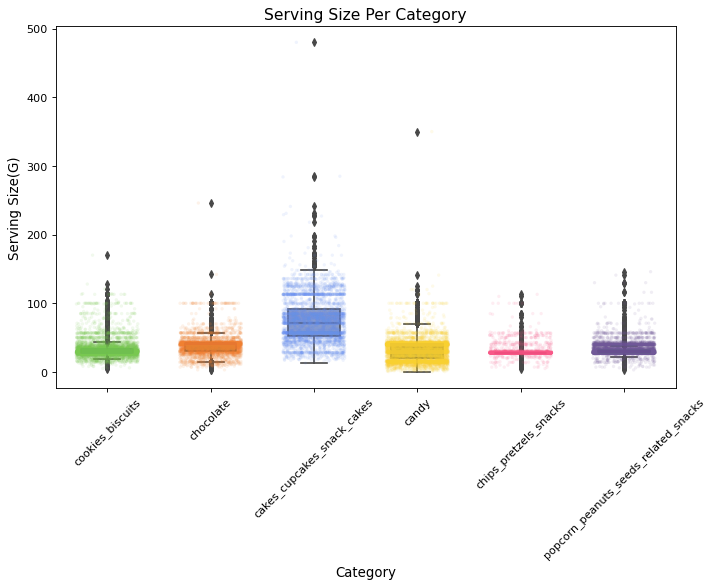

In [7]:
plt.figure(figsize=(10,6), dpi= 80)
colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
boxplot = sns.boxplot(x='category', y='serving_size', data=df2, palette=colors,notch=False,width=0.5,saturation=0.4)
boxplot = sns.stripplot(x="category", y="serving_size", data=df2, alpha=0.1,color="grey",palette=colors,size=3,jitter=0.3)
plt.xticks(rotation=45)
plt.ylabel(ylabel='Serving Size(G)',fontsize=12)
plt.xlabel(xlabel='Category',fontsize=12)
plt.title(label='Serving Size Per Category',fontsize=14)
plt.show()

### Observing the top 9 Ingredients occured in the data, and the % of snacks per category each ingredient occured In
#### Basically Lets see what is the main difference between the Ingredients for each category, Obviously we expect to almost for every snack in chips category a salt, while in the candy/chocolate we expect to have much lower.

In [8]:
ingredients = "\n".join(df2['ingredients'].fillna("empty"))
r = Rake()
r.extract_keywords_from_text(ingredients)
r.get_word_frequency_distribution().most_common()[:15]
# There are several which are not Ingredients by the book, like natural, organic etc... I did not look for them

[('),', 22590),
 ('oil', 4761),
 ('],', 4650),
 ('natural', 3350),
 ('organic', 3131),
 ('milk', 3082),
 ('salt', 3074),
 ('sugar', 3011),
 ('flavor', 2969),
 ('vanilla', 2941),
 ('acid', 2390),
 ('powder', 2157),
 ('corn', 2109),
 ('chocolate', 2101),
 ('*,', 2099)]

In [9]:
top_9ing = ['oil','milk','salt','sugar','vanilla','corn','chocolate','flour','butter'] # Picked them manually from previous calucaltions

df3 = df2[['idx','brand','description','ingredients','category']]
df3.fillna('empty',inplace=True)
for ing in top_9ing:
    df3[ing] = 0
    df3.loc[df3['ingredients'].str.contains(ing),ing] = 1
    
counts = df2.groupby('category').count().reset_index()[['category','idx']]
counts.rename(columns={'idx' : 'counts'},inplace=True)
df3 = pd.merge(df3.groupby(by='category').sum().reset_index(),counts,on='category')
df3[df3.columns[2:-1]] = df3[df3.columns[2:-1]].div(df3['counts'],axis=0)
df3 = df3.drop(columns=['idx','counts'],axis=1)
df3

category       oil      milk      salt  \
0            cakes_cupcakes_snack_cakes  0.933967  0.743265  0.980718   
1                                 candy  0.470200  0.232331  0.298259   
2                 chips_pretzels_snacks  0.951087  0.171196  0.975815   
3                             chocolate  0.485154  0.754772  0.512460   
4                      cookies_biscuits  0.831378  0.390802  0.932627   
5  popcorn_peanuts_seeds_related_snacks  0.673643  0.250752  0.700327   

      sugar   vanilla      corn  chocolate     flour    butter  
0  0.974115  0.236661  0.857369   0.216587  0.969097  0.404649  
1  0.913502  0.095596  0.737342   0.153745  0.090058  0.185258  
2  0.380978  0.008696  0.657880   0.004348  0.333424  0.122011  
3  0.951485  0.571845  0.330594   0.786850  0.132291  0.912778  
4  0.958554  0.324565  0.536147   0.305829  0.945496  0.408213  
5  0.473381  0.152126  0.356704   0.178940  0.117070  0.257031

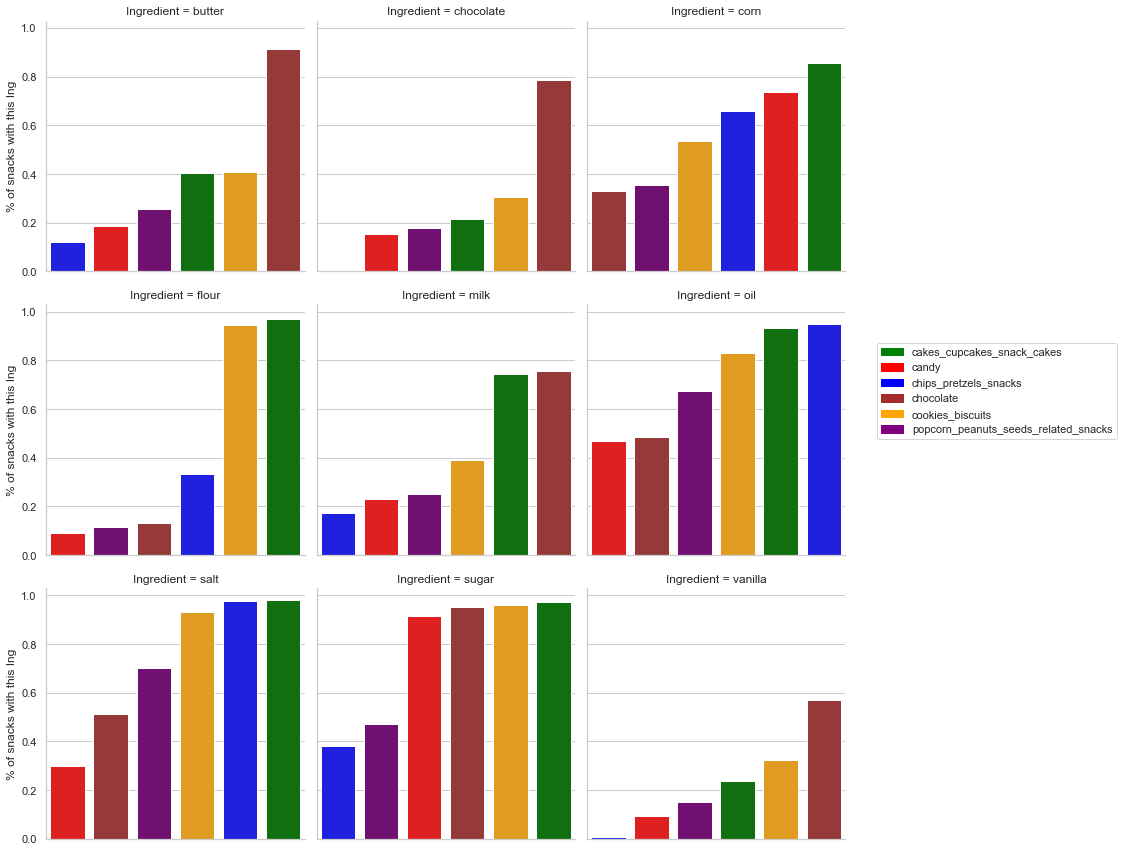

In [10]:
df4 = pd.melt(df3,id_vars="category",var_name="oil")
df4 = df4.sort_values(by=['oil','value'])
df4.rename(columns={'oil':'Ingredient','value' : '% of snacks with this Ing'},inplace=True)

# choose colors
name_to_color = {
    'cakes_cupcakes_snack_cakes':   'green',
    'candy':   'red',
    'chips_pretzels_snacks': 'blue',
    'chocolate' : 'brown',
    'cookies_biscuits' : 'orange',
    'popcorn_peanuts_seeds_related_snacks' : 'purple'
}

def plotting_func(*args,**kwargs):
    g = sns.barplot(x=args[0],y=args[1],palette=name_to_color)
    g.set(xticklabels=[])
    return g

sns.set_theme(style="whitegrid")
fg = sns.FacetGrid(df4,col='Ingredient',col_wrap=3,size=4,aspect=1)
bp = fg.map(plotting_func,'category','% of snacks with this Ing')
fg.set(xlabel = '')
fg.fig.tight_layout(w_pad=1)

# fix the legend
patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
# Plot the legend
plt.legend(handles=patches,bbox_to_anchor=(1.1, 2), loc=2, borderaxespad=0.5)

### Observing the Negative Correlation between High Energy and High Sugar in candy and popcorn categories
#### According to Previous observation popcorn category has the highest mean energy while candy has almost the lowest, but high sugar

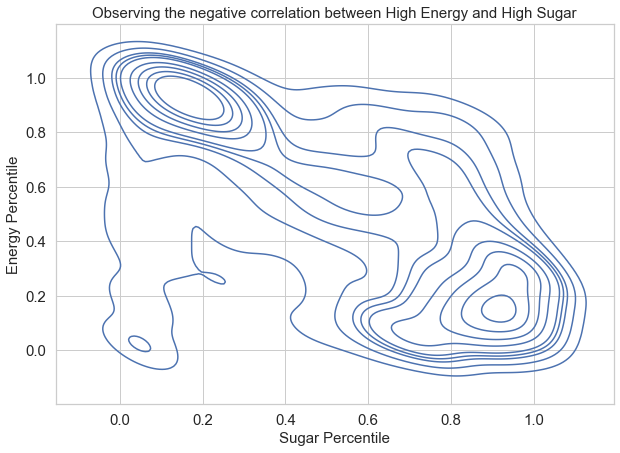

In [11]:
df4 = df2
df4['sugar_pct'] = df2['Sugars, total including NLEA'].rank(pct = True)
df4['energy_pct'] = df2['Energy'].rank(pct = True)
df5 = df4[(df4['category'] == 'candy') | (df4['category'] == 'popcorn_peanuts_seeds_related_snacks')]

plt.figure(figsize=(10,7))
p = sns.kdeplot(data= df5, x="sugar_pct", y="energy_pct")
plt.xlabel("Sugar Percentile",fontsize=15)
plt.ylabel("Energy Percentile",fontsize=15)
plt.title("Observing the negative correlation between High Energy and High Sugar",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show(p)

### Observing the top ingredients for snacks that thier sugar pct rank is greater than 0.7

In [12]:
df4 = df4[df4['sugar_pct'] > 0.7] # filter snacks that has sugar than at least 70% of the data
ingredients = "\n".join(df4['ingredients'].fillna("empty"))
r = Rake()
r.extract_keywords_from_text(ingredients)
top_ing_sugar = r.get_word_frequency_distribution().most_common()
top_ing_sugar[:15]

[('),', 6029),
 ('],', 1194),
 ('natural', 1176),
 ('oil', 1100),
 ('milk', 1089),
 ('flavor', 1081),
 ('vanilla', 992),
 ('artificial', 839),
 ('sugar', 837),
 ('emulsifier', 711),
 ('salt', 703),
 ('acid', 666),
 ('chocolate', 662),
 ('color', 594),
 ('corn', 557)]

In [13]:
# Choose manually the ingredients(some are not actually ingredients)
top_ing_sugar = ['oil','milk','vanilla','sugar','emulsifier','salt','chocolate','acid','corn','syrup']
df5 = df4[['idx','brand','description','ingredients','category']]
df5.fillna('empty',inplace=True)
for ing in top_ing_sugar:
    df5[ing] = 0
    df5.loc[df5['ingredients'].str.contains(ing),ing] = 1
    
counts = df4.groupby('category').count().reset_index()[['category','idx']]
counts.rename(columns={'idx' : 'counts'},inplace=True)
df5 = pd.merge(df5.groupby(by='category').sum().reset_index(),counts,on='category')
df5[df5.columns[2:-1]] = df5[df5.columns[2:-1]].div(df5['counts'],axis=0)
df5 = df5.drop(columns=['idx','counts'],axis=1)


In [14]:
import plotly.graph_objects as go

fig = go.Figure()
relevant_cols = df5.columns[1:]

for i in range(6):
    row = df5.iloc[i]
    cat = row[0]
    vals = row.values.tolist()[1:]
    fig.add_trace(go.Scatterpolar(
        r=vals,
        theta=relevant_cols,
        name=cat,
        showlegend=True))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True,range=[0, 1])),
    title="Top 10 Ingredients That occured in Snacks with high amount of sugar per category")

fig.show()
    

### PCA

In [15]:
numerical_cols = df4.select_dtypes(include=np.number).columns.tolist()
numerical_cols.pop(0) # idx col
numerical_cols.append('category')

def generate_pca(first_cat,second_cat,title,df,ax):
    df4= df[numerical_cols]
    df4= df4[(df4['category'] == first_cat) | (df4['category'] == second_cat)]
    df4 = df4[df4['category'].notna()]
    X = df4.fillna(0)
    del X['category']
    Xn = preprocessing.scale(X)
    pca = PCA(n_components=2)
    components = pca.fit_transform(Xn)
    sns.scatterplot(data=df4, x=components[:,0],y=components[:,1], hue=df4['category'],ax=ax)
    ax.set_ylim(-6,6)
    ax.set_title(title,fontsize=15)


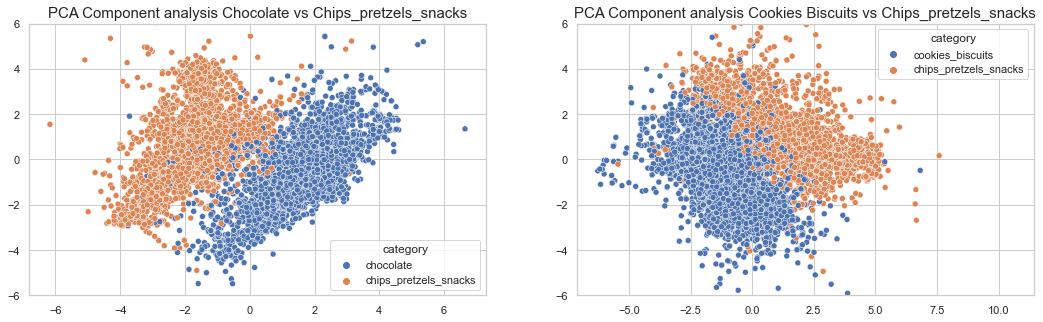

In [52]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 5))
generate_pca('chocolate','chips_pretzels_snacks','PCA Component analysis Chocolate vs Chips_pretzels_snacks',df2,ax1)
generate_pca('cookies_biscuits','chips_pretzels_snacks','PCA Component analysis Cookies Biscuits vs Chips_pretzels_snacks',df2,ax2)

### Density of number Ingredients per category

In [53]:
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def get_amnt_words(phrase):
    if phrase is None: 
        return []
    phrase = str(phrase).lower()
    phrase = phrase.translate(str.maketrans('', '', string.punctuation))
    phrase = set(word_tokenize(phrase)).difference(stopwords)
    phrase = set(filter(lambda i: not str.isdigit(i), phrase))
    l = len(set([stemmer.stem(w) for w in phrase if len(w) > 1]))
    return l

df2 = df_all.drop(['brand', 'description', 'household_serving_fulltext'], axis=1)

df2['amnt_ings'] = df2.ingredients.apply(get_amnt_words)

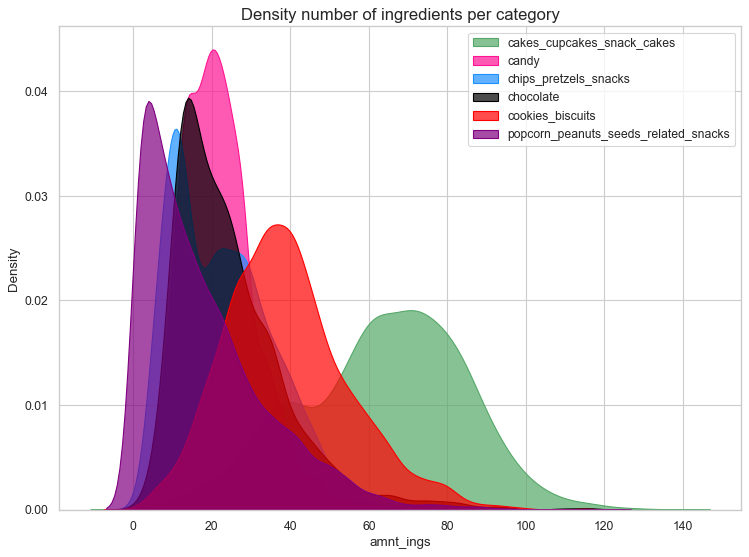

In [54]:
# Draw Plot
plt.figure(figsize=(11,8), dpi= 80)
sns.kdeplot(df2.loc[df2['category'] == 'cakes_cupcakes_snack_cakes', "amnt_ings"], shade=True, color="g", label="cakes_cupcakes_snack_cakes", alpha=.7)
sns.kdeplot(df2.loc[df2['category'] == 'candy', "amnt_ings"], shade=True, color="deeppink", label="candy", alpha=.7)
sns.kdeplot(df2.loc[df2['category'] == "chips_pretzels_snacks",'amnt_ings'], shade=True, color="dodgerblue", label="chips_pretzels_snacks", alpha=.7)
sns.kdeplot(df2.loc[df2['category'] == 'chocolate', "amnt_ings"], shade=True, color="black", label="chocolate", alpha=.7)
sns.kdeplot(df2.loc[df2['category'] == 'cookies_biscuits', "amnt_ings"], shade=True, color="red", label="cookies_biscuits", alpha=.7)
sns.kdeplot(df2.loc[df2['category'] == 'popcorn_peanuts_seeds_related_snacks', "amnt_ings"], shade=True, color="purple", label="popcorn_peanuts_seeds_related_snacks", alpha=.7)

plt.title('Density number of ingredients per category', fontsize=15)
plt.legend()
plt.show()

In [57]:
df_with_rgb = add_mean_rgb_to_data(df_all,'foods_final 2/train/')
df_with_rgb = df_with_rgb[df_with_rgb['category'].notna()]
df_with_rgb = df_with_rgb[df_with_rgb['R_mean'] != -1]

chips_pretzels_snacks
cookies_biscuits
cakes_cupcakes_snack_cakes
chocolate
popcorn_peanuts_seeds_related_snacks
candy


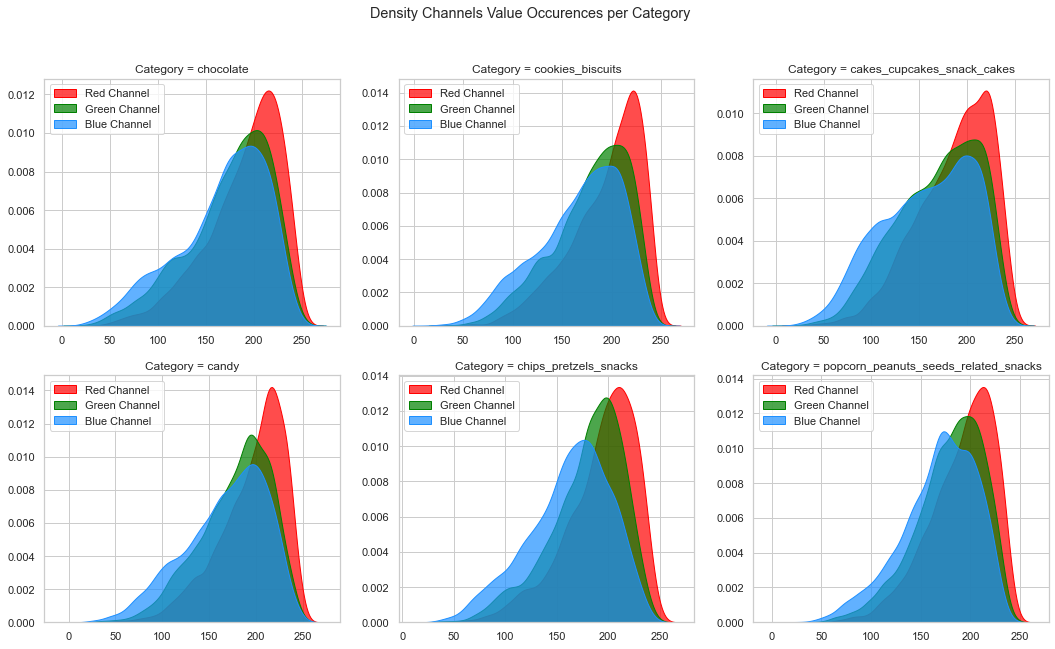

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
arr = np.array([[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]])
fig.suptitle('Density Channels Value Occurences per Category')
for category,l in zip(categories,arr):
    g = sns.kdeplot(df_with_rgb.loc[df_with_rgb['category'] == category, "R_mean"], color="red", label="Red Channel",shade=True, alpha=.7,ax=axes[l[0],l[1]])
    g = sns.kdeplot(df_with_rgb.loc[df_with_rgb['category'] == category, "G_mean"], color="green", label="Green Channel",shade=True, alpha=.7,ax=axes[l[0],l[1]])
    g = sns.kdeplot(df_with_rgb.loc[df_with_rgb['category'] == category,"B_mean"], color="dodgerblue", label="Blue Channel",shade=True, alpha=.7,ax=axes[l[0],l[1]])
    g.set_title(f"Category = {category}")
    g.set(xlabel="")
    g.set(ylabel="")
    axes[l[0],l[1]].legend(loc='upper left')

### Appendix 1 - Pre Proccessing the Images


In [56]:
def get_image(image_path):
    image = Image.open(image_path, "r")
    data = np.asarray(image)
    if image.mode != "RGB":
        return (-1,-1,-1)
    return (np.mean(data[:,:,0]),np.mean(data[:,:,1]),np.mean(data[:,:,2]))

def add_mean_rgb_to_data(df,directory_of_images):
    df['R_mean'] = 0.0
    df['G_mean'] = 0.0
    df['B_mean'] = 0.0
    
    for x in os.listdir(directory_of_images):
        if x == '.DS_Store':
            continue
        print(x)
        for t in os.listdir(f"{directory_of_images}/{x}"):
            img_idx = int(t.split('.')[0])
            R, G, B = get_image(f"{directory_of_images}/{x}/{t}")            
            df.loc[df['idx'] == img_idx, 'R_mean'] = R
            df.loc[df['idx'] == img_idx, 'G_mean'] = G
            df.loc[df['idx'] == img_idx, 'B_mean'] = B
    return df